In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip3 install tensorflow

import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import load_img

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
input_size = 150
size_inner = 64

In [11]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
base_model.trainable = False

##############################################

inputs = keras.Input(shape=(input_size, input_size, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.Conv2D(
    filters=32,
    kernel_size=(3,3),
    activation="relu")(base)

maxpool = keras.layers.MaxPool2D(pool_size=(2,2))(vectors)
flattened = tf.keras.layers.Flatten()(maxpool)
inner = keras.layers.Dense(64, activation='relu')(flattened)
activation = keras.layers.Dense(1)(inner)
outputs = tf.keras.layers.Softmax()(activation)
model = keras.Model(inputs, outputs)

##############################################

optimizer = keras.optimizers.SGD(lr=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=['accuracy'])

# each dense layer needs an activation to perform well. Previously we had only 1 layer and logits = True, what means that we take directly the raw values.
# we can add to the last layer softmax or sigmoid, which are activations to put in the output
# now we are adding another dense layer in the middle. We will add a relu activation to it . There are many,m but if not sure, add Relu

In [14]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 32)          589856    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 1, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                           

In [38]:
train_gen = ImageDataGenerator(
    rescale=1./255
  )
train_ds = train_gen.flow_from_directory(
  '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/train',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    )
val_gen = ImageDataGenerator(
    rescale=1./255
  )
val_ds = val_gen.flow_from_directory(
    '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/test',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    )


Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [39]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    workers=2560,
)

Epoch 1/10
184/184 [==============================] - 31s 130ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 0.2394 - val_accuracy: 0.4630
Epoch 2/10
184/184 [==============================] - ETA: 0s - loss: 7.6246 - accuracy: 0.5000

KeyboardInterrupt: ignored

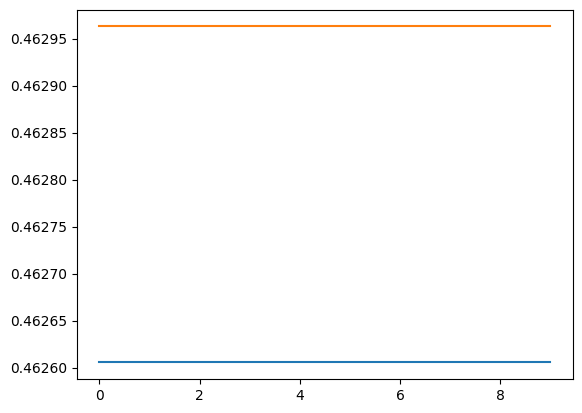

In [24]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='train')

In [26]:
np.std(history.history['loss'])

0.06517300644079217

In [27]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
  )
train_ds = train_gen.flow_from_directory(
  '/content/gdrive/MyDrive/Colab Notebooks/MLzoomcamp/data/train',
    target_size=(input_size, input_size),
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    )

Found 3677 images belonging to 2 classes.


In [28]:
history2 = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    workers=2560,
)

Epoch 1/10
184/184 [==============================] - 58s 283ms/step - loss: 0.3044 - accuracy: 0.4626 - val_loss: 0.2662 - val_accuracy: 0.4630
Epoch 2/10
184/184 [==============================] - 51s 263ms/step - loss: 0.2599 - accuracy: 0.4626 - val_loss: 0.1982 - val_accuracy: 0.4630
Epoch 3/10
117/184 [==================>...........] - ETA: 12s - loss: 0.2390 - accuracy: 0.4638

KeyboardInterrupt: ignored

In [29]:
np.mean(history.history['val_loss'])

0.24356815069913865

In [37]:
np.mean(history.history['val_accuracy'][5:])

0.46296295523643494